In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Importing plotly failed. Interactive plots will not work.


In [2]:
# DATA
df1 = pd.read_csv('data_day.csv')
df2 = pd.read_csv('data_2018-08-05_2021-04-30.csv')
df3 = pd.read_csv('data_2018-05-05_2018-08-04.csv')
df4 = pd.read_csv('data_2015-08-09_2018-05-04.csv')
df5 = pd.read_csv('data_2013-02-12_2015-08-08.csv')
df6 = pd.read_csv('data_2010-05-19_to_2013-02-11.csv')
df7 = pd.read_csv('data_2007-08-23_to_2010-05-18.csv')
df8 = pd.read_csv('data_2004-11-26_to_2007-08-22.csv')
df = pd.concat([df6, df5, df4, df3, df2, df1])
df.index = range(0,4996)
df.tail()

date_time = pd.concat([pd.to_datetime(df['datetime'][0:4000]),pd.to_datetime(df['datetime'][4000:])])
df['ds'] = date_time
 

In [3]:
df['y'] = df['temp']

In [4]:
df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'ds', 'y'],
      dtype='object')

In [23]:
data_used = df[['temp','tempmax', 'tempmin','humidity', 'precip','precipprob', 'windspeed', 'solarradiation', 'solarenergy','y','ds']]
columns_for_humidity = ['temp','tempmax', 'tempmin', 'precip','precipprob', 'windspeed', 'solarradiation', 'solarenergy']
columns_for_temp = ['temp','tempmax','tempmin','humidity', 'precip','precipprob', 'windspeed', 'solarradiation', 'solarenergy']
data_used.columns

Index(['temp', 'tempmax', 'tempmin', 'humidity', 'precip', 'precipprob',
       'windspeed', 'solarradiation', 'solarenergy', 'y', 'ds'],
      dtype='object')

In [26]:
save_prediction = []
corr_list = []
mae_list = []
mse_list = []
input = 365*10
output = 14
for i in range(input, len(data_used)-output):
    model_temp = Prophet()
    for column in columns_for_temp:
        model_temp.add_regressor(column)
    train = data_used.iloc[i-input:i]
    test = data_used.iloc[i:i+output]
    model_temp.fit(train)
    future = model_temp.make_future_dataframe(periods=output, freq='D')
    future = future[future['ds'] > model_temp.history_dates.max()]
    for column in columns_for_temp:
        future[column] = data_used[column][i-365:i+output-365].values
    forecast = model_temp.predict(future)
    save_prediction.append(forecast[['ds', 'yhat']])
    corr_list.append(test['y'].corr(forecast['yhat'][i:i+output]))
    print(mean_squared_error(test['y'].values, forecast['yhat'].values))
    print(mean_absolute_error(test['y'].values, forecast['yhat'].values))
    print(np.corrcoef(test['y'].values, forecast['yhat'].values))

23:38:13 - cmdstanpy - INFO - Chain [1] start processing
23:38:20 - cmdstanpy - INFO - Chain [1] done processing


11.784452097024786
2.7211044197884178
[[ 1.         -0.30543156]
 [-0.30543156  1.        ]]


23:38:21 - cmdstanpy - INFO - Chain [1] start processing
23:38:27 - cmdstanpy - INFO - Chain [1] done processing


12.346981864222084
2.78573714948552
[[ 1.         -0.30289163]
 [-0.30289163  1.        ]]


23:38:28 - cmdstanpy - INFO - Chain [1] start processing
23:38:34 - cmdstanpy - INFO - Chain [1] done processing


14.525896317350442
2.9786982186062567
[[ 1.         -0.32942989]
 [-0.32942989  1.        ]]


23:38:35 - cmdstanpy - INFO - Chain [1] start processing
23:38:41 - cmdstanpy - INFO - Chain [1] done processing


14.069928625690537
2.921551286047026
[[ 1.         -0.29237443]
 [-0.29237443  1.        ]]


23:38:41 - cmdstanpy - INFO - Chain [1] start processing
23:38:47 - cmdstanpy - INFO - Chain [1] done processing


13.960177568802754
2.89296528805223
[[ 1.         -0.24478532]
 [-0.24478532  1.        ]]


23:38:48 - cmdstanpy - INFO - Chain [1] start processing
23:38:54 - cmdstanpy - INFO - Chain [1] done processing


12.047534575440892
2.599925510654351
[[ 1.         -0.14498318]
 [-0.14498318  1.        ]]


23:38:55 - cmdstanpy - INFO - Chain [1] start processing
23:39:01 - cmdstanpy - INFO - Chain [1] done processing


8.488158734079867
2.228414641225698
[[1.         0.04930033]
 [0.04930033 1.        ]]


23:39:01 - cmdstanpy - INFO - Chain [1] start processing
23:39:08 - cmdstanpy - INFO - Chain [1] done processing


8.026835377627615
2.142822640941419
[[1.        0.0874558]
 [0.0874558 1.       ]]


23:39:08 - cmdstanpy - INFO - Chain [1] start processing
23:39:15 - cmdstanpy - INFO - Chain [1] done processing


8.147287051496125
2.221776578569897
[[1.         0.17055041]
 [0.17055041 1.        ]]


23:39:16 - cmdstanpy - INFO - Chain [1] start processing


KeyboardInterrupt: 

In [8]:
future = model_temp.make_future_dataframe(periods=len(test))
future = future[future['ds'] > model_temp.history_dates.max()]  # keep only future dates

for column in columns_for_temp:
    future[column] = test[column]

print(future)

             ds  humidity  precip  precipprob  windspeed  solarradiation  \
3996 2021-04-27      82.0   0.600         100       11.2           148.8   
3997 2021-04-28      85.6   5.856         100       20.5           205.6   
3998 2021-04-29      69.8   0.626         100       14.8           161.1   
3999 2021-04-30      75.5   1.500         100       20.5           256.3   
4000 2021-05-01      84.2   0.146         100       14.8           172.8   
...         ...       ...     ...         ...        ...             ...   
4991 2024-01-17      93.8   8.794         100       17.5           148.7   
4992 2024-01-18      84.5   0.683         100       19.4           140.8   
4993 2024-01-19      85.5   0.072         100       20.3           131.9   
4994 2024-01-20      82.4   3.300         100       20.5            63.7   
4995 2024-01-21      91.4   3.400         100       22.3            15.8   

      solarenergy  
3996         12.9  
3997         17.8  
3998         13.9  
3999   

6.368523099963554
2.0538294114586355
[[1.         0.88999895]
 [0.88999895 1.        ]]


c:\Users\tridu\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\tridu\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\tridu\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


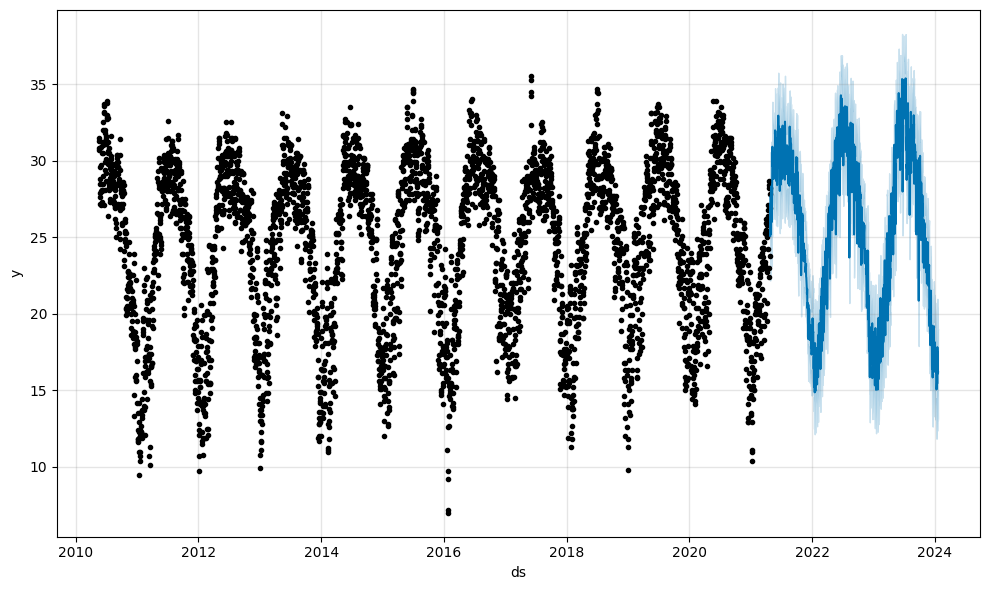

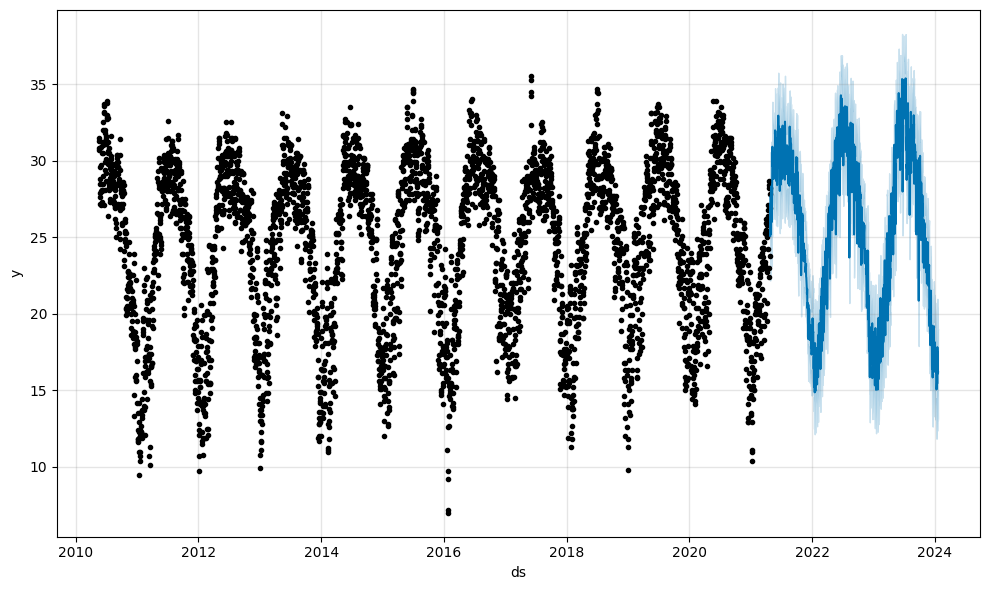

In [13]:
forecast = model_temp.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

print(mean_squared_error(test['y'].values, forecast['yhat']))
print(mean_absolute_error(test['y'].values, forecast['yhat']))
print(np.corrcoef(test['y'].values, forecast['yhat']))
fig1 = model_temp.plot(forecast)
list_cor = []
list_ab = []
list_sq = []
list_er = abs(test['y'].values - forecast['yhat'])
for i in range(len(test)-1):
    list_cor.append(np.corrcoef(test['y'][:(i+1)].values, forecast['yhat'][:(i+1)])[0,1])
    list_ab.append(mean_absolute_error(test['y'][:(i+1)].values, forecast['yhat'][:(i+1)]))
    list_sq.append(mean_squared_error(test['y'][:(i+1)].values, forecast['yhat'][:(i+1)]))

fig1 = model_temp.plot(forecast)


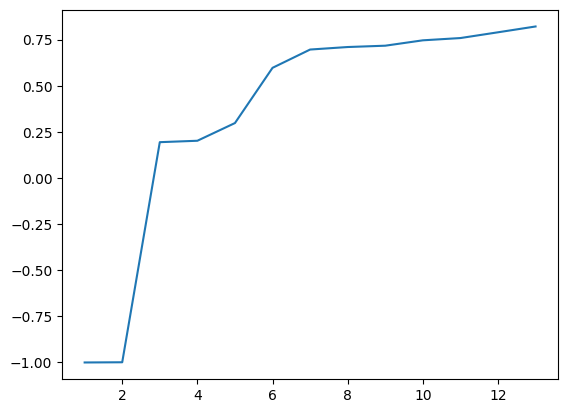

In [11]:
plt.plot(list_cor[:14])

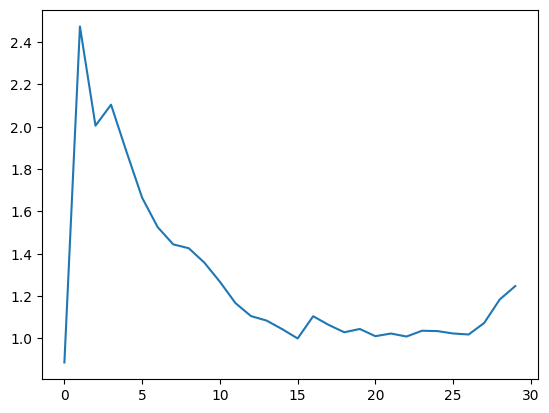

In [15]:
plt.plot(list_sq[:30])

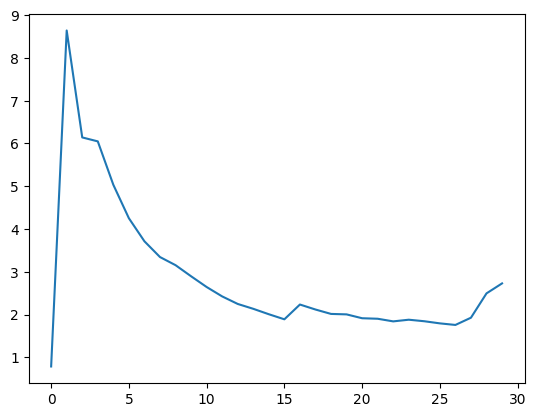

In [17]:
plt.plot(list_sq[:30])

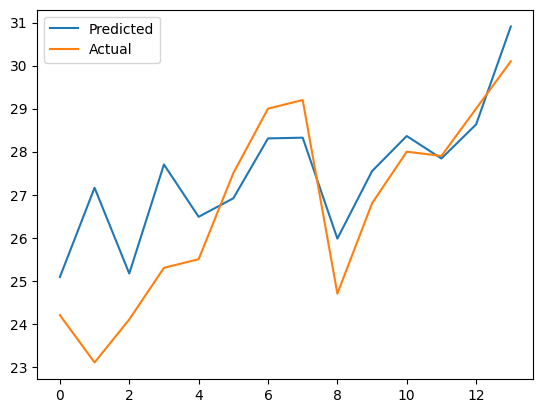

In [12]:
sample = 14
plt.plot(forecast['yhat'][:sample])
plt.plot(test['y'][:sample].values)
plt.legend(['Predicted', 'Actual'])

0     0.886190
1     4.061186
2     1.067549
3     2.402072
4     0.985845
5     0.584512
6     0.691879
7     0.874849
8     1.279040
9     0.747140
10    0.363678
11    0.059291
12    0.366511
13    0.809739
14    0.480602
Name: yhat, dtype: float64


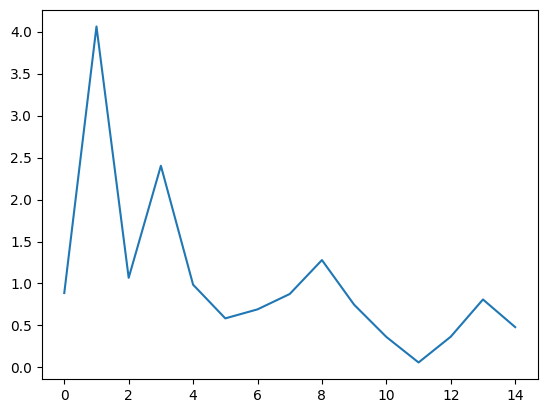

In [19]:
print(list_er[:15])
plt.plot(list_er[:15])

In [20]:
df['y'] = df['humidity']

In [23]:
model_humidity = Prophet()
for column in columns_for_humidity:
    model_humidity.add_regressor(column)
model_humidity.fit(train)

11:02:06 - cmdstanpy - INFO - Chain [1] start processing
11:02:07 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
future = model_humidity.make_future_dataframe(periods=len(test))
future = future[future['ds'] > model_humidity.history_dates.max()]  # keep only future dates

for column in columns_for_humidity:
    future[column] = test[column]

print(future)

             ds  temp  tempmax  tempmin  precip  precipprob  windspeed  \
3996 2021-04-27  24.2     27.2     21.0   0.600         100       11.2   
3997 2021-04-28  23.1     25.8     21.7   5.856         100       20.5   
3998 2021-04-29  24.1     28.6     20.0   0.626         100       14.8   
3999 2021-04-30  25.3     30.0     21.0   1.500         100       20.5   
4000 2021-05-01  25.5     29.0     23.0   0.146         100       14.8   
...         ...   ...      ...      ...     ...         ...        ...   
4991 2024-01-17  20.5     22.0     19.5   8.794         100       17.5   
4992 2024-01-18  22.4     26.5     20.0   0.683         100       19.4   
4993 2024-01-19  22.6     26.6     20.0   0.072         100       20.3   
4994 2024-01-20  23.0     26.0     19.0   3.300         100       20.5   
4995 2024-01-21  16.0     18.0     14.0   3.400         100       22.3   

      solarradiation  solarenergy  
3996           148.8         12.9  
3997           205.6         17.8  
399

125.99682115824615
9.715379142758062


c:\Users\tridu\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\tridu\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\tridu\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


0      79.364589
1      79.406872
2      75.113386
3      71.140200
4      79.990523
         ...    
995    77.386736
996    74.587432
997    74.067246
998    73.717212
999    72.663120
Name: yhat, Length: 1000, dtype: float64


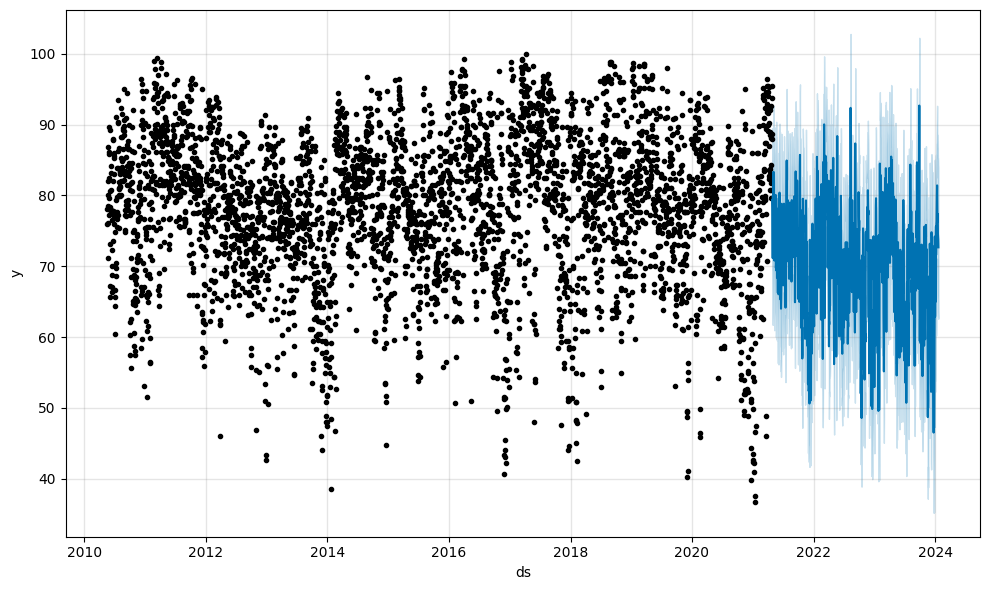

In [36]:
forecast = model_humidity.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

print(mean_squared_error(test['y'].values, forecast['yhat']))
print(mean_absolute_error(test['y'].values, forecast['yhat']))
list_cor = []
list_ab = []
list_sq = []
for i in range(len(test)-1):
    list_cor.append(np.corrcoef(test['y'][:(i+1)].values, forecast['yhat'][:(i+1)])[0,1])
    list_ab.append(mean_absolute_error(test['y'][:(i+1)].values, forecast['yhat'][:(i+1)]))
    list_sq.append(mean_squared_error(test['y'][:(i+1)].values, forecast['yhat'][:(i+1)]))
fig1 = model_humidity.plot(forecast)

print(forecast['yhat'])

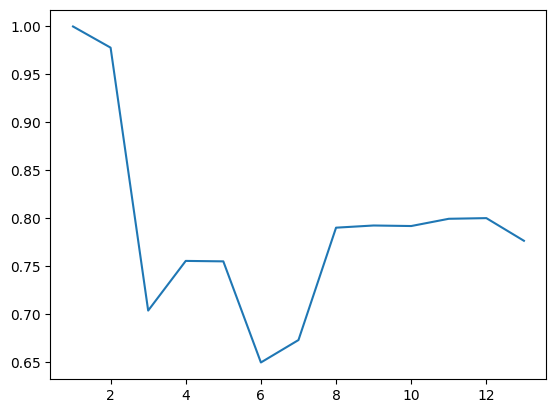

In [34]:
plt.plot(list_cor[:14])

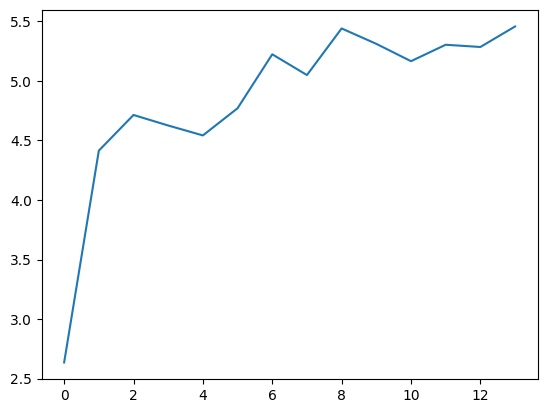

In [41]:
plt.plot(list_ab[:14])

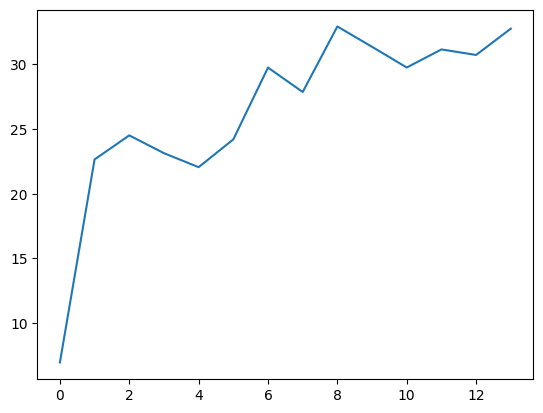

In [42]:
plt.plot(list_sq[:14])

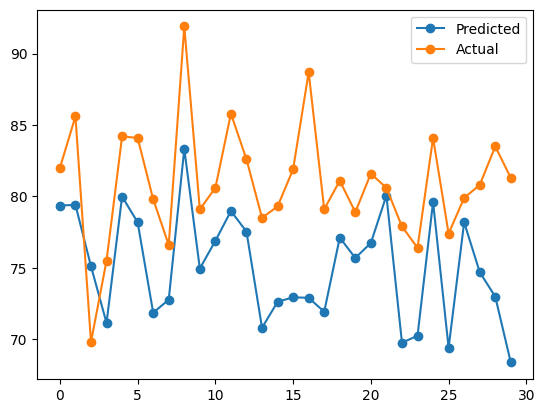

In [31]:
plt.plot(forecast['yhat'][:30], marker = 'o')
plt.plot(test['y'][:30].values, marker = 'o')
plt.legend(['Predicted', 'Actual'])